Importar Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('data.xlsx')

In [4]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         3500 non-null   int64 
 1   Patient Age                3500 non-null   int64 
 2   Patient Sex                3500 non-null   object
 3   Left-Fundus                3500 non-null   object
 4   Right-Fundus               3500 non-null   object
 5   Left-Diagnostic Keywords   3500 non-null   object
 6   Right-Diagnostic Keywords  3500 non-null   object
 7   N                          3500 non-null   int64 
 8   D                          3500 non-null   int64 
 9   G                          3500 non-null   int64 
 10  C                          3500 non-null   int64 
 11  A                          3500 non-null   int64 
 12  H                          3500 non-null   int64 
 13  M                          3500 non-null   int64 
 14  O       

# Fotografía global del dataset
    Filas :3500
    Columnas:15
    Valores nulos: 0
    Tipos de variables: int64 + String
    

In [6]:
print(type(df["Patient Sex"][0]))
print(type(df["Left-Fundus"][0]))
print(type(df["Right-Fundus"][0]))
print(type(df["Left-Diagnostic Keywords"][0]))
print(type(df["Right-Diagnostic Keywords"][0]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Revisamos duplicados en ID

In [7]:
df.ID.duplicated().sum()  # Verificar si hay IDs duplicados

0

Text(0.5, 0, 'Edad')

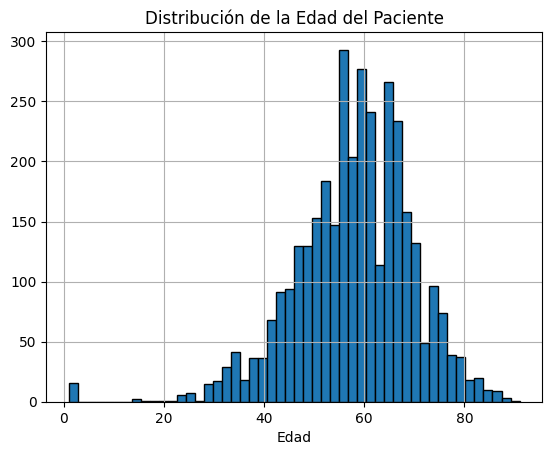

In [8]:
df["Patient Age"].hist(bins=50, edgecolor='black')
plt.title('Distribución de la Edad del Paciente')
plt.xlabel('Edad')

In [ ]:
df[df["Patient Age"] > 1].sort_values(by="Patient Age", ascending=True).head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2265,2888,14,Female,2888_left.jpg,2888_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2410,3033,15,Male,3033_left.jpg,3033_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3242,4392,17,Male,4392_left.jpg,4392_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2924,4047,18,Female,4047_left.jpg,4047_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2280,2903,19,Male,2903_left.jpg,2903_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2475,3098,22,Female,3098_left.jpg,3098_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
1076,1116,23,Male,1116_left.jpg,1116_right.jpg,idiopathic choroidal neovascularization,maculopathy,0,0,0,0,0,0,0,1
3148,4291,23,Male,4291_left.jpg,4291_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
1555,2074,24,Male,2074_left.jpg,2074_right.jpg,glaucoma，lens dust,cataract，suspected cataract,0,0,1,1,0,0,0,0
2468,3091,24,Male,3091_left.jpg,3091_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [9]:
df[df["Patient Age"] < 10]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1169,1242,1,Female,1242_left.jpg,1242_right.jpg,chorioretinal atrophy,normal fundus,0,0,0,0,0,0,0,1
1383,1563,1,Female,1563_left.jpg,1563_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1384,1564,1,Female,1564_left.jpg,1564_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1385,1565,1,Female,1565_left.jpg,1565_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1388,1568,1,Female,1568_left.jpg,1568_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1400,1583,1,Female,1583_left.jpg,1583_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1404,1588,1,Female,1588_left.jpg,1588_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1405,1589,1,Female,1589_left.jpg,1589_right.jpg,pathological myopia,pathological myopia,0,0,0,0,0,0,1,0
1406,1590,1,Female,1590_left.jpg,1590_right.jpg,normal fundus,pathological myopia,0,0,0,0,0,0,1,0
1410,1595,1,Female,1595_left.jpg,1595_right.jpg,tessellated fundus，peripapillary atrophy,pathological myopia,0,0,0,0,0,0,1,1


comentar con el equipo

Patient Sex
Male      1885
Female    1615
Name: count, dtype: int64

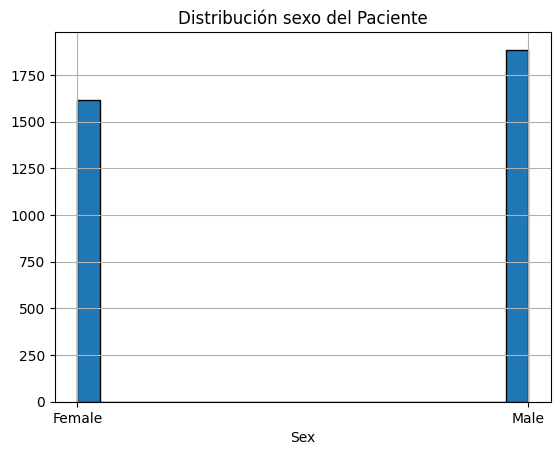

In [10]:
df["Patient Sex"].hist(bins=20, edgecolor='black')
plt.title('Distribución sexo del Paciente')
plt.xlabel('Sex')
df['Patient Sex'].value_counts()

C:\Users\Nauzet\AppData\Local\Temp\ipykernel_7952\3357102163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")


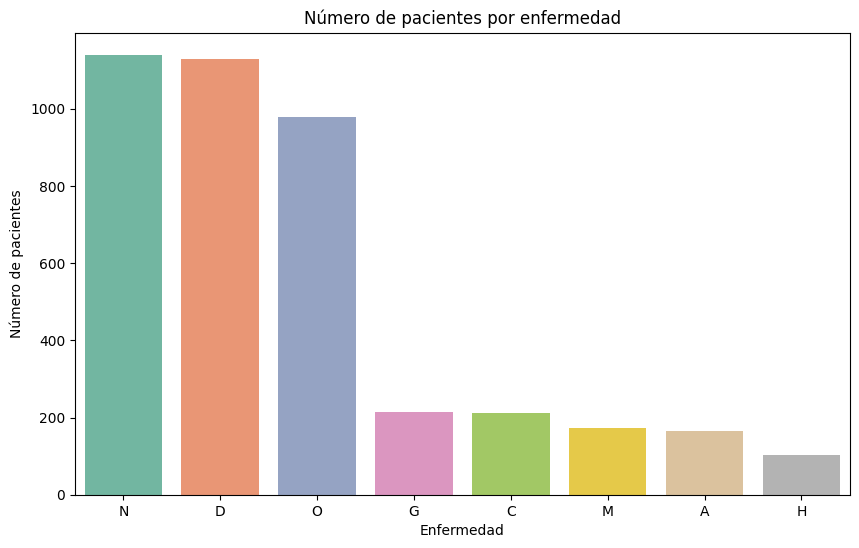

In [11]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

disease_counts = df[disease_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="Set2")
plt.title('Número de pacientes por enfermedad')
plt.xlabel('Enfermedad')
plt.ylabel('Número de pacientes')
plt.show()

In [12]:
import pandas as pd
import re

def contar_enfermedades(df, columnas):
    """
    Devuelve (recuento_por_enfermedad, nº_total_distintas)
    """
    # Patrón que contempla:
    #   ,  -> coma ASCII
    #   ， -> coma china U+FF0C
    #   ;  -> punto y coma (opcional, por si acaso)
    separadores = r'[,\uFF0C;]\s*'

    s = (
        df[columnas]
          .stack()            # junta las columnas en un único Series
          .astype(str)        # asegura que todo es string
          .str.split(separadores, regex=True, expand=False)  # <-- AQUÍ EL CAMBIO
          .explode()          # cada elemento en su propia fila
          .str.strip()        # quita espacios al inicio/fin
          .str.lower()        # homogeneiza mayúsculas/minúsculas
    )

    s = s[s != '']            # elimina cadenas vacías
    recuento = s.value_counts()
    return recuento, recuento.size
#NUEVO
#[11:18]
cols = ["Left-Diagnostic Keywords", "Right-Diagnostic Keywords"]
conteo, total_distintas = contar_enfermedades(df, cols)

print(conteo)               # las 10 más frecuentes
print(f"\nTotal de enfermedades distintas: {total_distintas}")

normal fundus                             3100
moderate non proliferative retinopathy     997
mild nonproliferative retinopathy          552
lens dust                                  408
cataract                                   313
                                          ... 
optic discitis                               1
wedge white line change                      1
arteriosclerosis                             1
silicone oil eye                             1
no fundus image                              1
Name: count, Length: 102, dtype: int64

Total de enfermedades distintas: 102


In [13]:
df[df['Left-Diagnostic Keywords'].str.contains('no fundus image')]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3408,4580,68,Male,4580_left.jpg,4580_right.jpg,no fundus image,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


COMENTAMOS EQUIPO

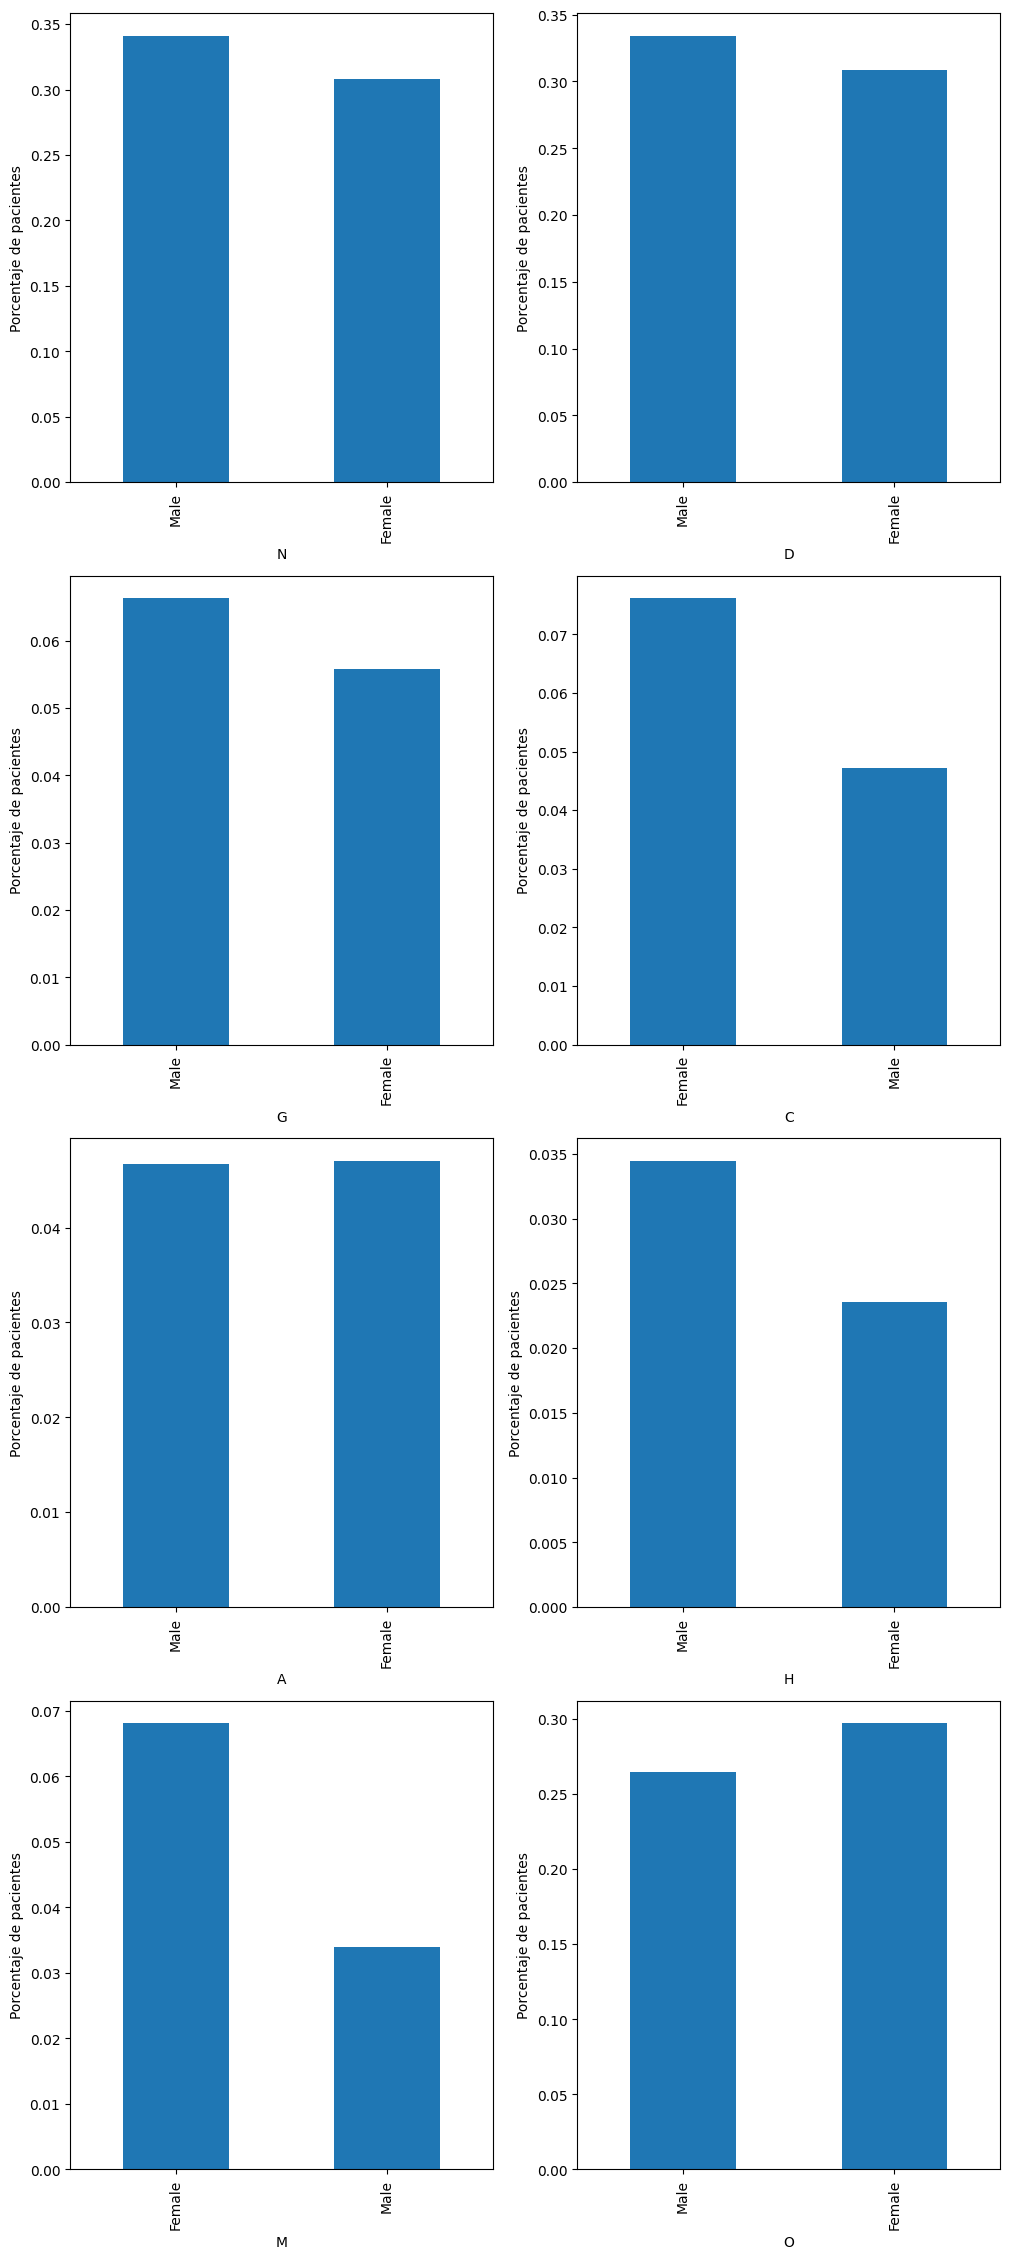

In [14]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 7 * n_rows))  # Dynamic figure size
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    counts.plot.bar()
    plt.xlabel(d)
    plt.ylabel('Porcentaje de pacientes')
    
plt.show()


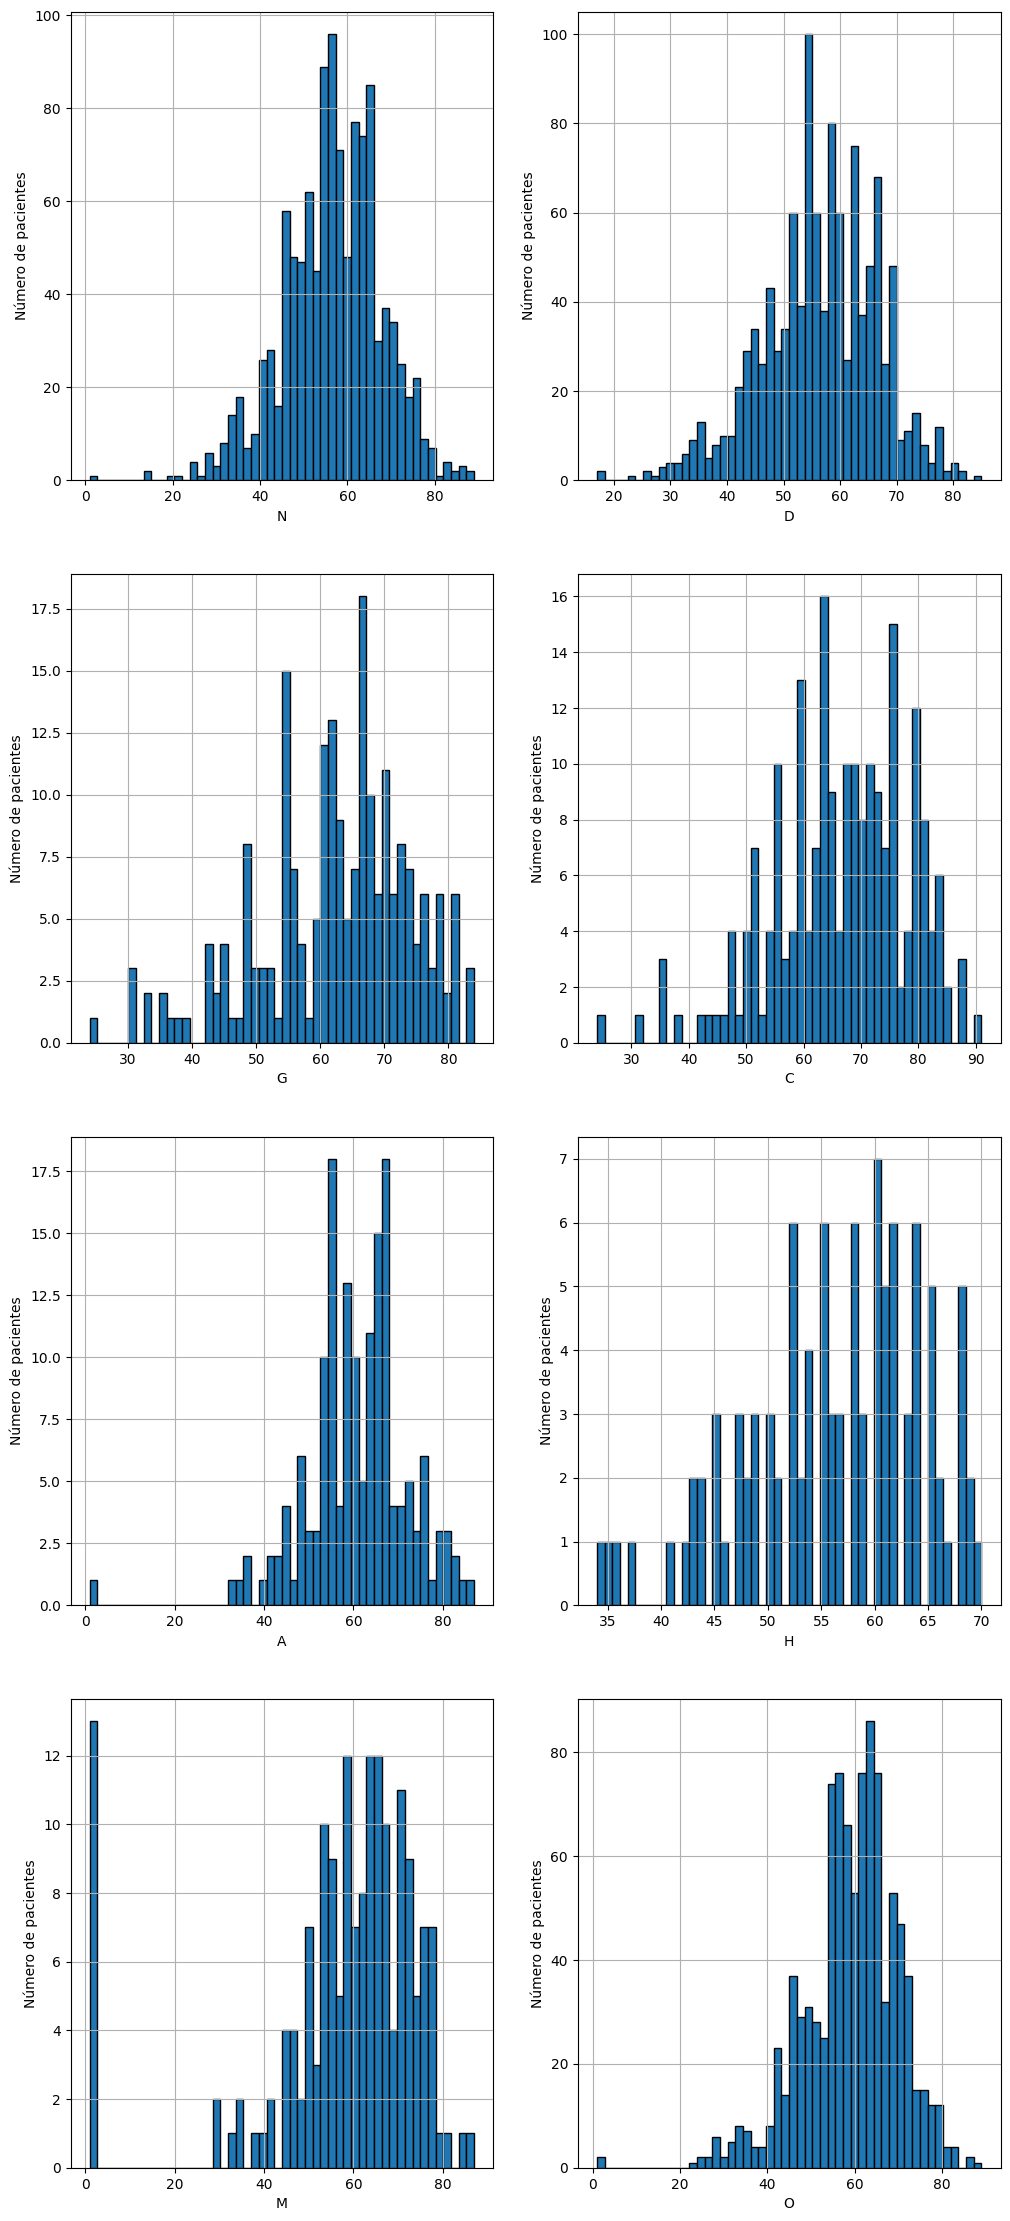

In [15]:
disease_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
#print(type(df['Patient Sex'].value_counts()))
n_cols = 2
n_rows = 4
plt.figure(figsize=(6 * n_cols, 7 * n_rows))  # Dynamic figure size
for i, d in enumerate(disease_cols,start=1):
    df_sel = df[df[d] == 1]
    plt.subplot(n_rows, n_cols, i)
    #sns.kdeplot(df_sel['Patient Age'], fill=True, color='skyblue', alpha=0.5)
    df_sel["Patient Age"].hist(bins=50, edgecolor='black')
#    counts = df_sel['Patient Sex'].value_counts()/df['Patient Sex'].value_counts()
    plt.xlabel(d)
    plt.ylabel('Número de pacientes')
    
plt.show()


Tareas por hacer:
- Duplicados ID ok
-   Histogramas de age y sex ok
-  Pacientes / Enfermedades ok
-    anotaciones unicas + distribucion ok
-    Sexo / Enfermedades. ok
-    Age / Enfermedades. ok
-    Check normal en dos ojos --> N? ok
-    ID distribucion enfermedades ok
-    test estadistico de sexo / enfermedad
-    test estadistico de age / enfermedad
-    añadir información para rag de todas las enfermedades.

    


In [29]:
# Filtro con ambas condiciones:
# 1) N == 1
# 2) La columna NO contiene "normal fundus"
mask = (df["N"] == 1) & (~df["Left-Diagnostic Keywords"].str.contains("normal fundus", na=False))

casos_n = df[mask]

# Si solo quieres ver los primeros 5 registros:
casos_n.shape
print(casos_n)

        ID  Patient Age Patient Sex    Left-Fundus    Right-Fundus  \
2642  3265           45        Male  3265_left.jpg  3265_right.jpg   
2779  3402           55      Female  3402_left.jpg  3402_right.jpg   
3015  4149           55        Male  4149_left.jpg  4149_right.jpg   
3147  4290           51        Male  4290_left.jpg  4290_right.jpg   

           Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  \
2642  lens dust，lens dust，lens dust   lens dust，normal fundus  1  0  0  0  0   
2779            lens dust，lens dust   lens dust，normal fundus  1  0  0  0  0   
3015              low image quality         low image quality  1  0  0  0  0   
3147              low image quality             normal fundus  1  0  0  0  0   

      H  M  O  
2642  0  0  0  
2779  0  0  0  
3015  0  0  0  
3147  0  0  0  


Debatir esta parte de los lens dust

In [45]:
x =  df[['D','G','C','A','H','M','O']].sum(axis=1)
x.value_counts().sort_index()

0    1140
1    1774
2     557
3      29
Name: count, dtype: int64

- opcional crear columna categorica con la cantidad de enfermedades.
- opcional crear columna Binaria con si es lens dust o no 0/1

In [51]:
df["Patient Age"].describe()

count    3500.000000
mean       57.854000
std        11.724064
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64